<a href="https://colab.research.google.com/github/Antoni-Pietryga/machine-learning-bootcamp/blob/master/supervised/02_basics/06_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import bibliotek

In [0]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as pltmake_
from sklearn.datasets import make_regression

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6,suppress=True)


#Wygenerowanie danych

In [24]:
data, target = make_regression(n_samples=200, n_features=1,noise=20)

target = target ** 2

print(data[:5])
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]
[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


#Regresja liniowa

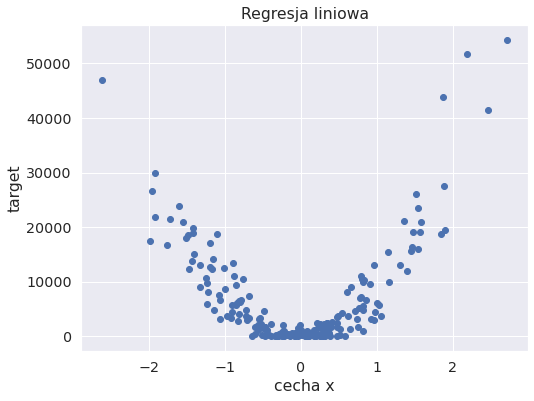

In [25]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.scatter(data,target,label='dane')
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

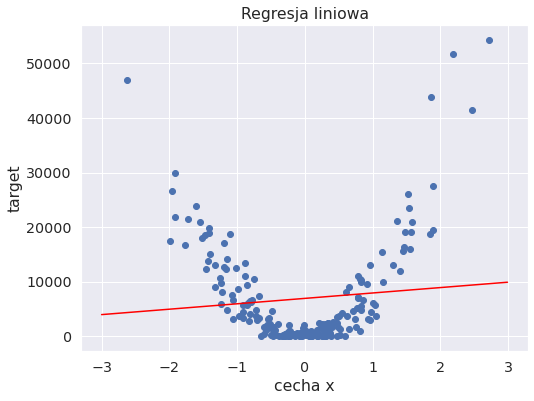

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data,target)

plot_data = np.arange(-3,3,0.01).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.plot(plot_data,regressor.predict(plot_data),c='red',label='regresja liniowa')
plt.scatter(data,target,label='dane')
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

#Regresja drzew decyzyjnych

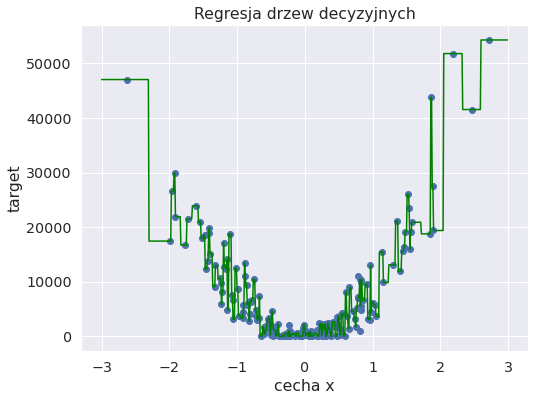

In [27]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data,regressor.predict(plot_data),c='green',label='regresja drzew decyzyjnych')
plt.scatter(data,target,label='dane')
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

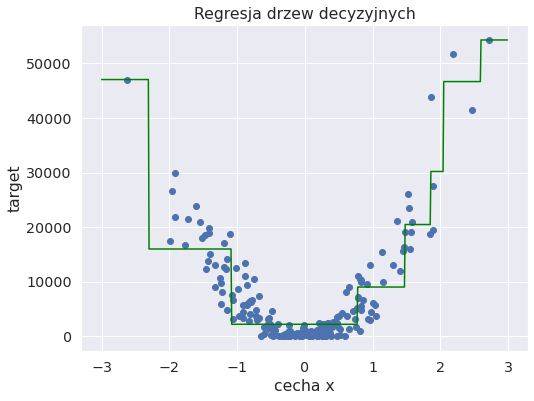

In [28]:
max_depth = 3
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data,regressor.predict(plot_data),c='green',label='regresja drzew decyzyjnych, max depth=1')
plt.scatter(data,target,label='dane')
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()


#Graf drzewa decyzyjnego

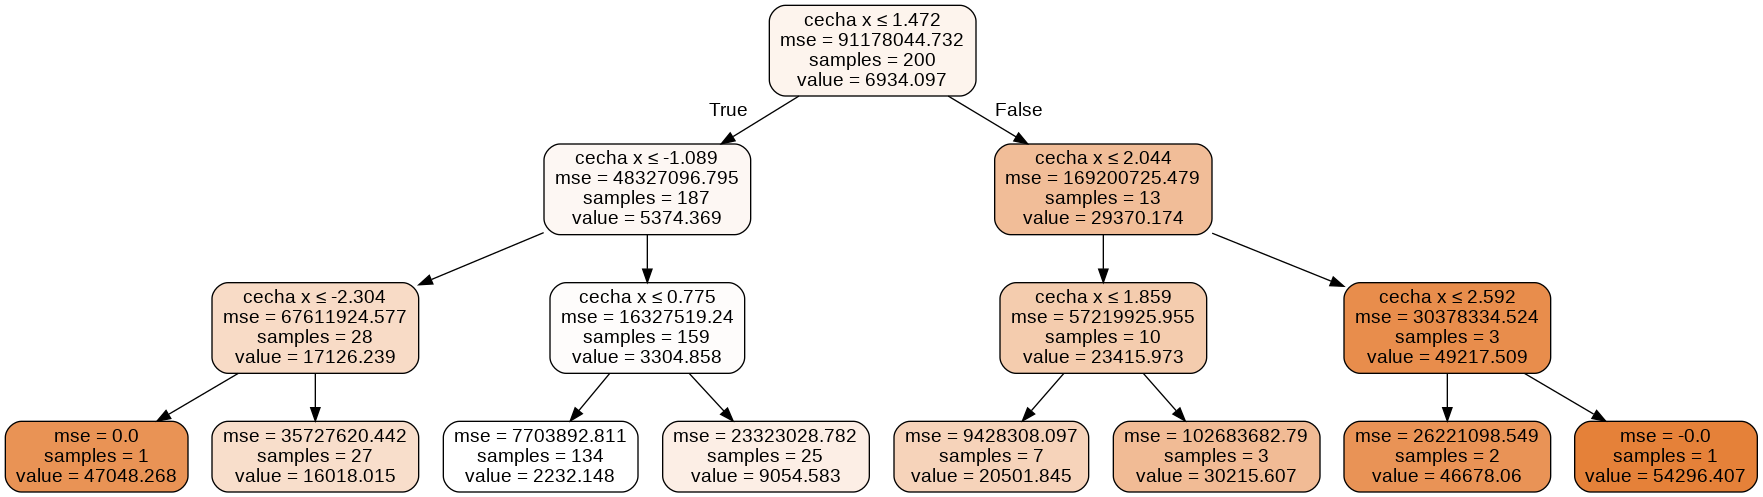

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data =StringIO()
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

#Model drzewa decyzyjnego - budowa funkcji

In [0]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data,target)

    plt.figure(figsize=(8,6))
    plt.plot(plot_data,regressor.predict(plot_data),c='red')
    plt.scatter(data,target)

    dot_data =StringIO()
    export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    return Image(graph.create_png(), width=300+max_depth * 100)



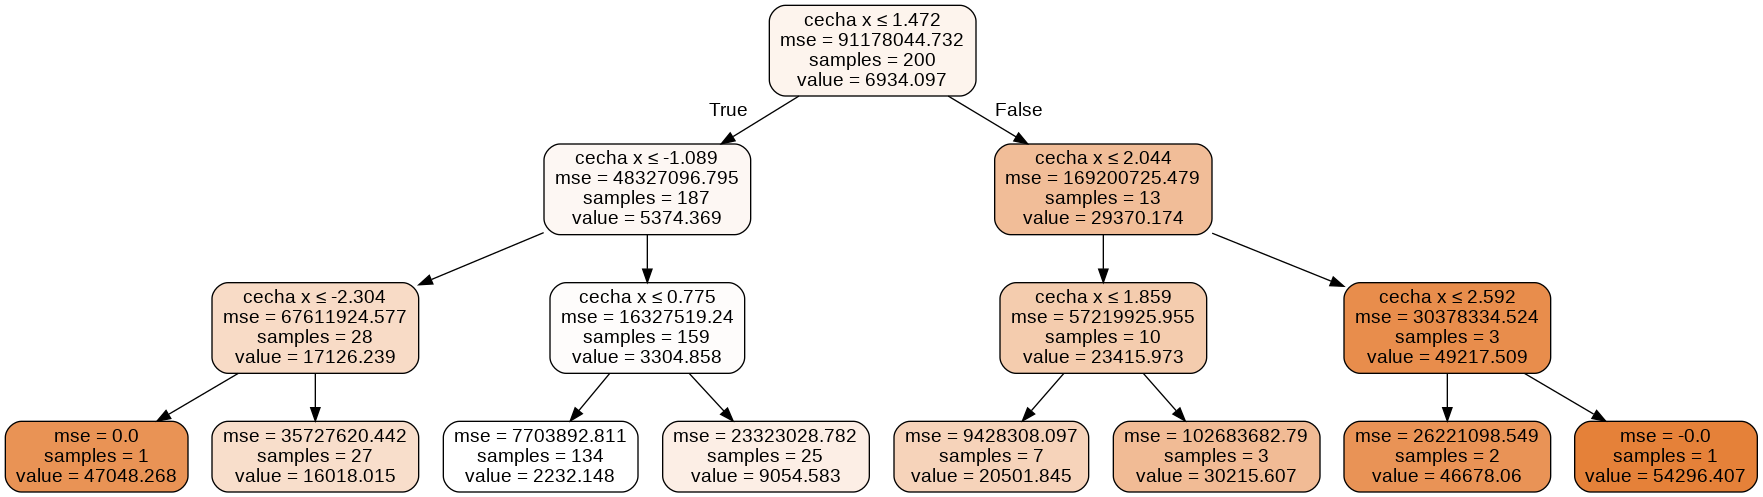

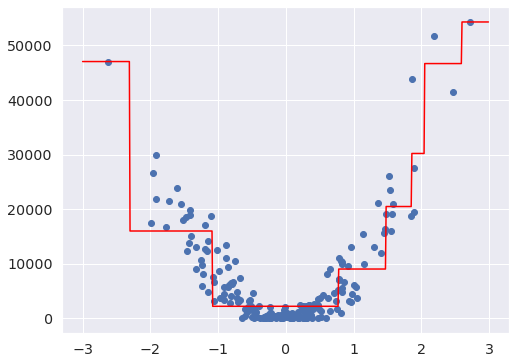

In [33]:
make_dt_regression(3)